Importing Libraries and Loading Data

In [1]:
# Import necessary libraries
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
print(f"Features: {cancer.feature_names}")
print("")
print(f"Target: {cancer.target_names}")


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


Data Preparation

In [2]:
# Create a DataFrame from the dataset's data and feature names
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add a 'target' column to the DataFrame
df["target"] = cancer.target

# Display the first few rows of the DataFrame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Splitting

In [3]:
# Split the data into training and testing sets
X = df.drop(columns=["target"])
y = df["target"]

# Specify the test size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")


Train: (455, 30)
Test: (114, 30)


Model Training and Evaluation

In [4]:
# Create a Logistic Regression model and train it
model = LogisticRegression(solver='lbfgs',
                           max_iter=100,
                           verbose=1,
                           n_jobs=-1)
model.fit(X_train, y_train)

# Calculate and print the training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Training Accuracy: 0.96
Testing Accuracy: 0.96


These are optimization algorithms used by the Logistic Regression model in scikit-learn to find the optimal coefficients (weights) that minimize the logistic loss function during training. Each of these optimization algorithms has its characteristics and can be suitable for different scenarios. Here's an explanation of each:

- lbfgs (Limited-memory Broyden-Fletcher-Goldfarb-Shanno):

Method: Quasi-Newton method.

Characteristics: lbfgs is a good choice for small to medium-sized datasets. It works well when there are a moderate number of features. It approximates the Hessian matrix (second-order derivative of the loss function) using limited memory.

- liblinear:

Method: Iterative solver.

Characteristics: liblinear is suitable for small and medium-sized datasets. It is efficient and works well with high-dimensional data. It uses a coordinate descent algorithm and is particularly useful for L1-regularized logistic regression (Lasso).

- newton-cg (Newton Conjugate Gradient):

Method: Iterative method based on Newton's method.
Characteristics: newton-cg is suitable for small and medium-sized datasets. It uses the Newton-Raphson method with conjugate gradient to optimize the logistic loss function. It can handle both L1 and L2 regularization.

- newton-cholesky:

Method: Iterative method based on Newton's method with Cholesky decomposition.

Characteristics: newton-cholesky is suitable for small and medium-sized datasets. It uses the Newton-Raphson method with Cholesky decomposition for optimization. It can handle both L1 and L2 regularization.

- sag (Stochastic Average Gradient Descent):

Method: Stochastic gradient descent with an average gradient.

Characteristics: sag is suitable for large datasets with a large number of samples and features. It is a variant of stochastic gradient descent that maintains an average of the past gradients, leading to faster convergence for large-scale problems.

- saga (Stochastic Average Gradient Descent with Average):

Method: Stochastic gradient descent with an average gradient and L1 regularization.

Characteristics: saga is similar to sag but includes support for L1 regularization (Lasso). It is suitable for large datasets and is particularly useful when you need both L1 regularization and efficient optimization.

The choice of optimization algorithm often depends on the dataset size, the number of features, and whether you require specific regularization techniques (e.g., L1 or L2). It's recommended to try multiple algorithms and cross-validate to determine which one performs best for your specific machine learning problem.

# Cross-validation

Cross-validation is a technique used to evaluate the performance of different machine learning models or hyperparameters on a dataset. It helps you determine which model or set of hyperparameters works best for your specific problem. Here's how you can use cross-validation to compare different optimization algorithms for logistic regression:

Select a Set of Algorithms to Compare:

Choose the optimization algorithms you want to compare. In your case, you have lbfgs, liblinear, newton-cg, newton-cholesky, sag, and saga.

Prepare Your Data:

Make sure your dataset is properly preprocessed, including feature scaling and handling missing values, if necessary.

Split Your Data:

Split your dataset into training and testing sets. Typically, you use cross-validation on the training set to evaluate different algorithms or hyperparameters.

Perform Cross-Validation:....

- from sklearn.model_selection import cross_val_score
- from sklearn.linear_model import LogisticRegression
- models = {
    'lbfgs': LogisticRegression(solver='lbfgs'),
    'liblinear': LogisticRegression(solver='liblinear'),
    'newton-cg': LogisticRegression(solver='newton-cg'),
    'newton-cholesky': LogisticRegression(solver='newton-cholesky'),
    'sag': LogisticRegression(solver='sag'),
    'saga': LogisticRegression(solver='saga')
}
.....



Select the Best Algorithm:
After cross-validation, you will have performance scores for each algorithm. You can select the algorithm with the highest average score as the best-performing one for your specific problem.

Confusion Matrix and Visualization

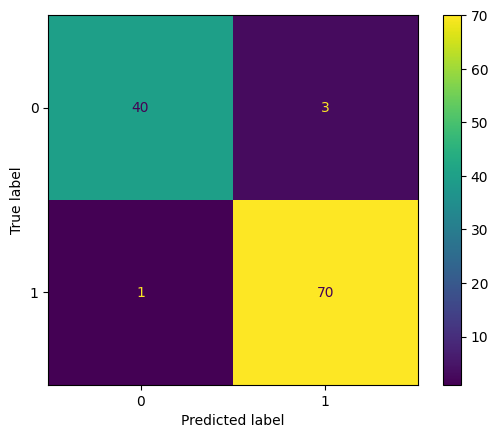

In [5]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate and display the confusion matrix
cm = metrics.confusion_matrix(y_test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()




<Axes: xlabel='mean concave points'>

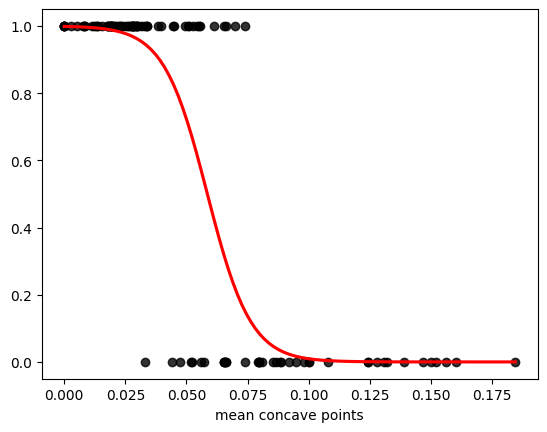

In [6]:
# Create a scatter plot with logistic regression curve
x = X_test["mean concave points"]
y = predictions

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None,
            scatter_kws={'color': 'black'},
            line_kws={'color': 'red'})